# Lab 4 - Hypothesis testing and statistical analysis

## Loading data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from math import sqrt

df = pd.read_csv('census11sample.csv', index_col=0)
df.head(10)

## Dividing data

In [5]:
numberOfEntries = len(df.index)
print("Number of rows is " + str(numberOfEntries) + ".")

Number of rows is 1000.


Now I should divide by two to find out where exactly the midpoint is. We should cast the result to an integer, since splitting doesn't work with floating point values. Here it wouldn't have made a difference, but it's an important point to make.

In [6]:
midPoint = int(numberOfEntries/2)
print("Midpoint is " + str(midPoint) + ".")

Midpoint is 500.


Having confirmed that the midpoint is 500 I can carry on with splitting the data.

## Splitting the data

Splitting the data is simple, we can use the iloc method. It allows us to retrieve specific values given we know the index assigned to them, the method only works with integer values and that's why we made sure that the mid point of the dataset is an integer by casting earlier. In this case we would use the iloc method to get multiple values, so we can just get a range of indices.

In [11]:
sample_explore = df.iloc[:midPoint]
sample_test = df.iloc[midPoint:]

Now let's take a look at our dataset which we will use for data exploration.

In [13]:
sample_explore

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19
...,...,...,...,...,...,...,...,...,...
495,27,37,30,65,21,20,43,62,48
496,63,39,76,57,47,77,56,64,68
497,62,26,21,69,14,53,3,65,19
498,15,68,4,63,44,7,23,36,8


As we can see, the set only has 500 rows - which is exactly what we wanted. This means we have split the data successfully.

## Means, modes and medians of each region

Here I calculate all means, modes and medians for all regions and save them in corresponding varibles in case I need them later.

In [14]:
# Means of each region.
meanNE = sample_explore["North East"].mean(axis = 0)
meanNW = sample_explore["North West"].mean(axis = 0)
meanYH = sample_explore["Yorkshire and The Humber"].mean(axis = 0)
meanEM = sample_explore["East Midlands"].mean(axis = 0)
meanWM = sample_explore["West Midlands"].mean(axis = 0)
meanEE = sample_explore["East of England"].mean(axis = 0)
meanL = sample_explore["London"].mean(axis = 0)
meanSE = sample_explore["South East"].mean(axis = 0)
meanSW = sample_explore["South West"].mean(axis = 0)

# Modes of each region.
modeNE = sample_explore["North East"].mode()
modeNW = sample_explore["North West"].mode()
modeYH = sample_explore["Yorkshire and The Humber"].mode()
modeEM = sample_explore["East Midlands"].mode()
modeWM = sample_explore["West Midlands"].mode()
modeEE = sample_explore["East of England"].mode()
modeL = sample_explore["London"].mode()
modeSE = sample_explore["South East"].mode()
modeSW = sample_explore["South West"].mode()

# Medians of each region.
medianNE = sample_explore["North East"].median()
medianNW = sample_explore["North West"].median()
medianYH = sample_explore["Yorkshire and The Humber"].median()
medianEM = sample_explore["East Midlands"].median()
medianWM = sample_explore["West Midlands"].median()
medianEE = sample_explore["East of England"].median()
medianL = sample_explore["London"].median()
medianSE = sample_explore["South East"].median()
medianSW = sample_explore["South West"].median()

## Means of each region

Let's take a look at all the means.

In [15]:
print("")
print("The mean age in the North East is " + str(meanNE) + ".")
print("The mean age in the North West is " + str(meanNW) + ".")
print("The mean age in the Yorkshire and The Humber is " + str(meanYH) + ".")
print("The mean age in the East Midlands is " + str(meanEM) + ".")
print("The mean age in the West Midlands is " + str(meanWM) + ".")
print("The mean age in the East of England is " + str(meanEE) + ".")
print("The mean age in the London is " + str(meanL) + ".")
print("The mean age in the South East is " + str(meanSE) + ".")
print("The mean age in the South West is " + str(meanSW) + ".")


The mean age in the North East is 41.12.
The mean age in the North West is 39.53.
The mean age in the Yorkshire and The Humber is 38.492.
The mean age in the East Midlands is 38.76.
The mean age in the West Midlands is 40.582.
The mean age in the East of England is 42.104.
The mean age in the London is 35.074.
The mean age in the South East is 41.198.
The mean age in the South West is 43.428.


Even though a floating point value (i.e. 41.12) wouldn't be considered a standard age because any human would just say an integer (i.e. 41) - I thought leaving the decimal places like they are and not approximating any values, because then I would lose valuable information, for example I wouldn't be able to tell that the average age in the North East is a bit lower than the one in the South East - because they'd both be 41 otherwise.

## Modes of each region

Let's take a look at all the modes.

In [16]:
print("")
currentLenght = 0

# North East
currentLength = len(modeNE)
print("There was/were " + str(currentLength) + " mode/modes for the North East Region - ", end = '')
if(currentLength == 1):
        print(str(modeNE[0]) + ".")
else:
    for i in range(currentLength):
        print(str(modeNE[i]), end = '')
        if(i + 1 != currentLength):
            print(", ", end='')
        else:
            print(".")

# North West 
currentLength = len(modeNW)
print("There was/were " + str(currentLength) + " mode/modes for the North West Region - ", end = '')
if(currentLength == 1):
        print(str(modeNW[0]) + ".")
else:
    for i in range(currentLength):
        print(str(modeNW[i]), end = '')
        if(i + 1 != currentLength):
            print(", ", end='')
        else:
            print(".")

# Yorkshite and The Humber
currentLength = len(modeYH)
print("There was/were " + str(currentLength) + " mode/modes for the Yorkshite and The Humber Region - ", end = '')
if(currentLength == 1):
        print(str(modeYH[0]) + ".")
else:
    for i in range(currentLength):
        print(str(modeYH[i]), end = '')
        if(i + 1 != currentLength):
            print(", ", end='')
        else:
            print(".")

# East Midlands
currentLength = len(modeEM)
print("There was/were " + str(currentLength) + " mode/modes for the East Midlands Region - ", end = '')
if(currentLength == 1):
        print(str(modeEM[0]) + ".")
else:
    for i in range(currentLength):
        print(str(modeEM[i]), end = '')
        if(i + 1 != currentLength):
            print(", ", end='')
        else:
            print(".")

# West Midlands
currentLength = len(modeWM)
print("There was/were " + str(currentLength) + " mode/modes for the West Midlands Region - ", end = '')
if(currentLength == 1):
        print(str(modeWM[0]) + ".")
else:
    for i in range(currentLength):
        print(str(modeWM[i]), end = '')
        if(i + 1 != currentLength):
            print(", ", end='')
        else:
            print(".")

# East of England 
currentLength = len(modeEE)
print("There was/were " + str(currentLength) + " mode/modes for the East of England  Region - ", end = '')
if(currentLength == 1):
        print(str(modeEE[0]) + ".")
else:
    for i in range(currentLength):
        print(str(modeEE[i]), end = '')
        if(i + 1 != currentLength):
            print(", ", end='')
        else:
            print(".")

# London
currentLength = len(modeL)
print("There was/were " + str(currentLength) + " mode/modes for the London Region - ", end = '')
if(currentLength == 1):
        print(str(modeL[0]) + ".")
else:
    for i in range(currentLength):
        print(str(modeL[i]), end = '')
        if(i + 1 != currentLength):
            print(", ", end='')
        else:
            print(".")

# South East
currentLength = len(modeSE)
print("There was/were " + str(currentLength) + " mode/modes for the South East Region - ", end = '')
if(currentLength == 1):
        print(str(modeSE[0]) + ".")
else:
    for i in range(currentLength):
        print(str(modeSE[i]), end = '')
        if(i + 1 != currentLength):
            print(", ", end='')
        else:
            print(".")

# South West  
currentLength = len(modeSW)
print("There was/were " + str(currentLength) + " mode/modes for the South West Region - ", end = '')
if(currentLength == 1):
        print(str(modeSW[0]) + ".")
else:
    for i in range(currentLength):
        print(str(modeSW[i]), end = '')
        if(i + 1 != currentLength):
            print(", ", end='')
        else:
            print(".")


There was/were 1 mode/modes for the North East Region - 45.
There was/were 4 mode/modes for the North West Region - 0, 18, 46, 47.
There was/were 2 mode/modes for the Yorkshite and The Humber Region - 30, 47.
There was/were 2 mode/modes for the East Midlands Region - 17, 20.
There was/were 1 mode/modes for the West Midlands Region - 18.
There was/were 1 mode/modes for the East of England  Region - 52.
There was/were 4 mode/modes for the London Region - 25, 30, 34, 38.
There was/were 1 mode/modes for the South East Region - 64.
There was/were 1 mode/modes for the South West Region - 47.


I wanted to display each mode, not just the first one, since the mode() method returns a list of all modes from a set, so I used some for loops to tailor the output accordingly.

## Medians of each region

Let's take a look at all the medians.

In [17]:
print("")
print("The median age in the North East is " + str(medianNE) + ".")
print("The median age in the North West is " + str(medianNW) + ".")
print("The median age in the Yorkshire and The Humber is " + str(medianYH) + ".")
print("The median age in the East Midlands is " + str(medianEM) + ".")
print("The median age in the West Midlands is " + str(medianWM) + ".")
print("The median age in the East of England is " + str(medianEE) + ".")
print("The median age in the London is " + str(medianL) + ".")
print("The median age in the South East is " + str(medianSE) + ".")
print("The median age in the South West is " + str(medianSW) + ".")


The median age in the North East is 42.0.
The median age in the North West is 40.0.
The median age in the Yorkshire and The Humber is 37.0.
The median age in the East Midlands is 37.0.
The median age in the West Midlands is 42.0.
The median age in the East of England is 41.0.
The median age in the London is 33.5.
The median age in the South East is 42.0.
The median age in the South West is 44.0.


Some of them end in '.0', because the median() method returns values of a floating point type. I could convert to integer (because, again, a value with a floating point wouldn't be considered a standrd age by humans), but in some cases the value ends in '.5' and I would lose that information if I were to cast to integer.

From all of these we notice that we get the youngest ages are in London, since the means and medians are lowest there. This make me wonder if the highest amount of young people is in London. Let's test this by setting up a bar graph! For my definiton of a young person I am referring to young adults - so I am looking for people in the age range of 20-30.

I notice as well that as regard to old people I can't guess the single region with the most old people, so I am also interested in that. For my definiton of an old person I am referring to elderly people - so I am looking for people in the age range of 60-100.

## Young adults and elderly people in England

Now we need to count all entries per region with people whose age is between 18 and 30 and people whose age is between 60 and 100.

In [18]:
regions = list(sample_explore.columns)

agesY = [0]*9
counter = 0
i = 0
currYoungPplCounter = 0

for region in regions:
    currRegionAges = sample_explore[region].tolist()
    for age in currRegionAges:
        if age >= 20 and age <=30:
            currYoungPplCounter+=1
    agesY[i] = currYoungPplCounter
    currYoungPplCounter = 0
    i+=1   
    
agesO = [0]*9
counter = 0
i = 0
currOldPplCounter = 0

for region in regions:
    currRegionAges = sample_explore[region].tolist()
    for age in currRegionAges:
        if age >= 60 and age <=100:
            currOldPplCounter+=1
    agesO[i] = currOldPplCounter
    currOldPplCounter = 0
    i+=1

Now that we have both the number of young adults and elderly people in each region, we can easily make a new data frame, which we can later use to make a bar plot.

In [19]:
regions = ['North East', 'North West', 'Yorkshire & Humber', 'East Midlands', 'West Midlands', 'East of England', 'London', 'South East', 'South West']
people = pd.DataFrame({
                        'Regions' : regions,
                        'Young Adults (20-30)' : agesY,
                        'Elderly People (60-100)' : agesO
                        })
people

,Regions,Young Adults (20-30),Elderly People (60-100)
0,North East,78,122
1,North West,58,112
2,Yorkshire & Humber,90,100
3,East Midlands,74,120
4,West Midlands,62,118
5,East of England,63,138
6,London,90,80
7,South East,74,127
8,South West,67,132


We better visualise the differences in the values in the two columns by creating a bar plot. I chose a bar plot over any other graph, as it best visualises the difference btween the number of young people in each region and old people in each region. We also get to see a comparison between young and old people.

Text(0, 0.5, 'Number of People')

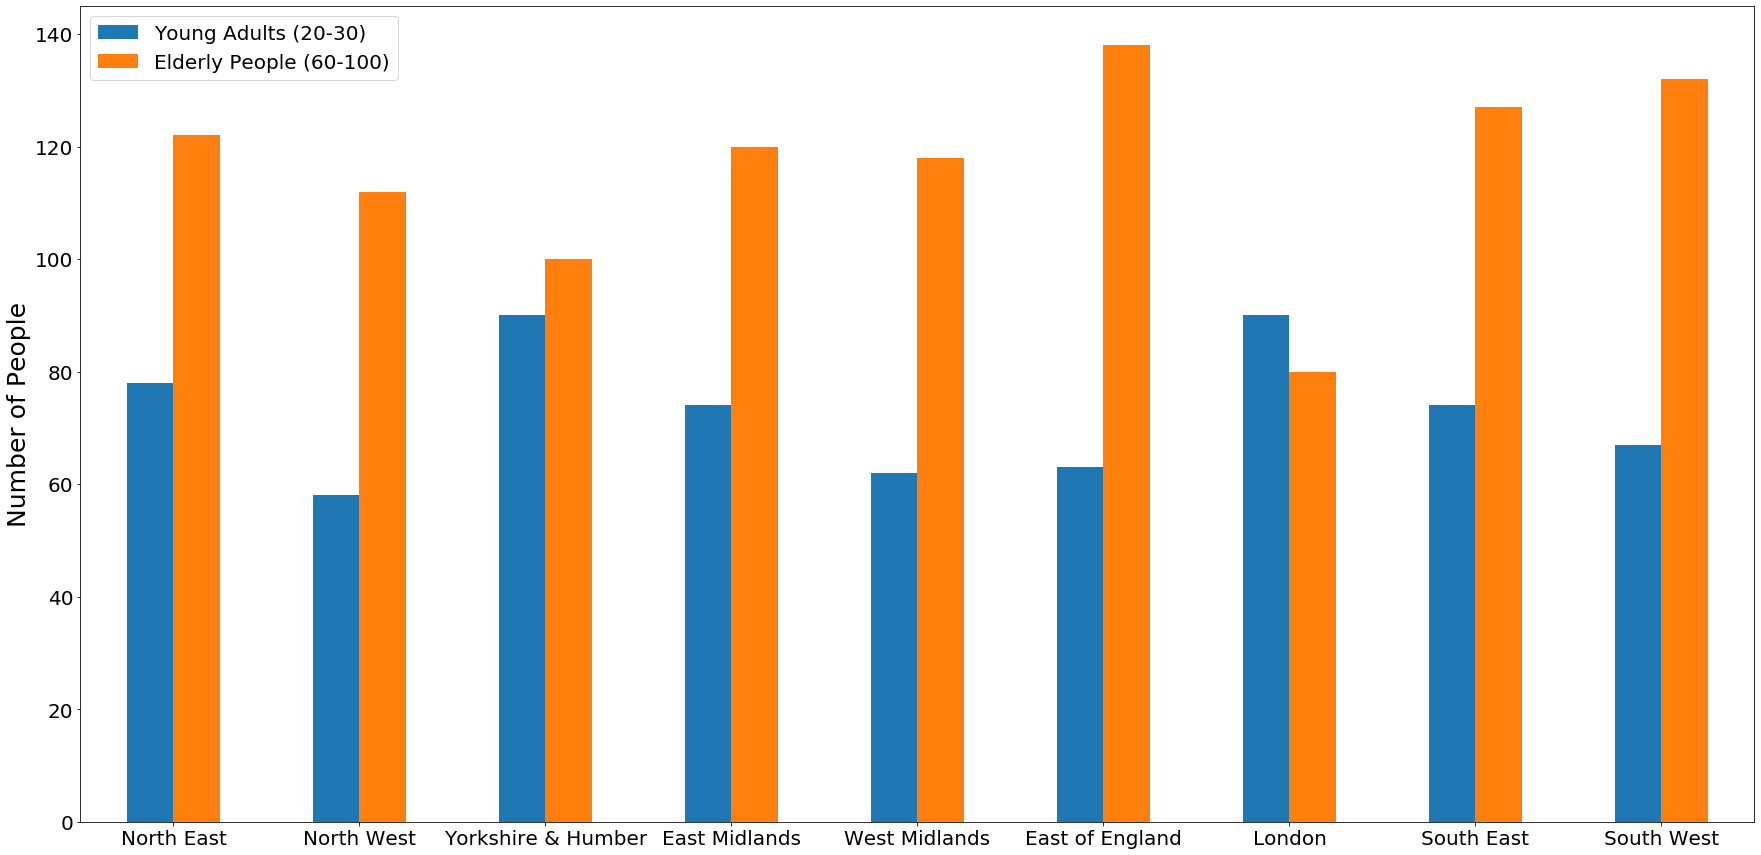

In [20]:
barPlot = people.plot.bar(x = 'Regions', y = ['Young Adults (20-30)', 'Elderly People (60-100)'], figsize = (30,15), fontsize = 20, rot = 0)
barPlot.legend(loc=2, prop={'size': 20})
plt.xlabel("")
plt.ylabel("Number of People", fontsize = 25)

After inspection, we can determine that the region with most elderly people is East of England and, ironically, London being the one next to it - is the one with most young adults, as well as Yorkshire and the Humber, even though London still is the only one with more young adults than elderly people. London also exhibits the least amount of elderly people, while the least amount of young adults is in the North West.

So from this we can see that there may be a slight difference in age distribution between the North and South parts of England, even though the amount of young adults in Londond and the Yorkshire and The Humber area is the same, there are much more elderly people in the latter, so naturally that would suggest a higher average age for the population - let's investigate further.

## London and Yorkshire and the Humbler's age groups

London is the only region where the young adults outnumber the elderly population - that does make London's age distribution very interesting. Yorkshire and the Humber also poses as an interesting place since it has the same amount of young adults as London, even though the elderly population does outnumber them. Let's take a look into their other three age groups - children, teenagers and adults.

For my definition of children, teenagers and adults, I consider them to be people between 0-12, 13-17 and 31-59 years old respectively. So now we can enrich our 'people' dataframe with all other age groups.

In [21]:
regions = list(sample_explore.columns)

agesC = [0]*9
counter = 0
i = 0
currChildrenCounter = 0

for region in regions:
    currRegionAges = sample_explore[region].tolist()
    for age in currRegionAges:
        if age >= 0 and age <=11:
            currChildrenCounter+=1
    agesC[i] = currChildrenCounter
    currChildrenCounter = 0
    i+=1   
    
agesT = [0]*9
counter = 0
i = 0
currTeenagersCounter = 0

for region in regions:
    currRegionAges = sample_explore[region].tolist()
    for age in currRegionAges:
        if age >= 12 and age <=19:
            currTeenagersCounter+=1
    agesT[i] = currTeenagersCounter
    currTeenagersCounter = 0
    i+=1
    
agesA = [0]*9
counter = 0
i = 0
currAdultsCounter = 0

for region in regions:
    currRegionAges = sample_explore[region].tolist()
    for age in currRegionAges:
        if age >= 31 and age <=59:
            currAdultsCounter+=1
    agesA[i] = currAdultsCounter
    currAdultsCounter = 0
    i+=1

Now let's re-create our data frame so all age groups are ordered appropriately.

In [22]:
regions = ['North East', 'North West', 'Yorkshire & Humber', 'East Midlands', 'West Midlands', 'East of England', 'London', 'South East', 'South West']
people = pd.DataFrame({
                        'Regions' : regions,
                        'Children (0-11)' : agesC,
                        'Teenagers (12-19)' : agesT,
                        'Young Adults (20-30)' : agesY,
                        'Adults (31-59)' : agesA,
                        'Elderly People (60-100)' : agesO
                        })
people

,Regions,Children (0-11),Teenagers (12-19),Young Adults (20-30),Adults (31-59),Elderly People (60-100)
0,North East,57,47,78,196,122
1,North West,69,64,58,197,112
2,Yorkshire & Humber,58,60,90,192,100
3,East Midlands,72,63,74,171,120
4,West Midlands,65,57,62,198,118
5,East of England,63,46,63,190,138
6,London,88,53,90,189,80
7,South East,71,33,74,195,127
8,South West,55,46,67,200,132


So now that we have all the data we need about all regions, we can easily make a pie chart describing the percentages of different age groups in London and the Yorkshire and the Humber region..

However we find out that we can't make a pie chart of what we want since all regions are row indices of the dataframe and the age groups are column indices, as the pie chart takes a y axis argument, we can't give a region. A way to tackle this issue is transpoing our data frame.

In [23]:
peopleT = people.T
peopleT

,0,1,2,3,4,5,6,7,8
Regions,North East,North West,Yorkshire & Humber,East Midlands,West Midlands,East of England,London,South East,South West
Children (0-11),57,69,58,72,65,63,88,71,55
Teenagers (12-19),47,64,60,63,57,46,53,33,46
Young Adults (20-30),78,58,90,74,62,63,90,74,67
Adults (31-59),196,197,192,171,198,190,189,195,200
Elderly People (60-100),122,112,100,120,118,138,80,127,132


Now a new problem has appeared, our column indices are the integers which numbered the regions when they were row indices, that wasn't a problem before, but now we can't intuitively specify a region name and get a corresponding pie chart, so we must make our top row the new column index.

In [24]:
new_header = peopleT.iloc[0]
peopleT = peopleT[1:]
peopleT.columns = new_header
peopleT

Regions,North East,North West,Yorkshire & Humber,East Midlands,West Midlands,East of England,London,South East,South West
Children (0-11),57,69,58,72,65,63,88,71,55
Teenagers (12-19),47,64,60,63,57,46,53,33,46
Young Adults (20-30),78,58,90,74,62,63,90,74,67
Adults (31-59),196,197,192,171,198,190,189,195,200
Elderly People (60-100),122,112,100,120,118,138,80,127,132


Now that we've fixed this issue, all we have to do is create a pie chart and compare the two regions.

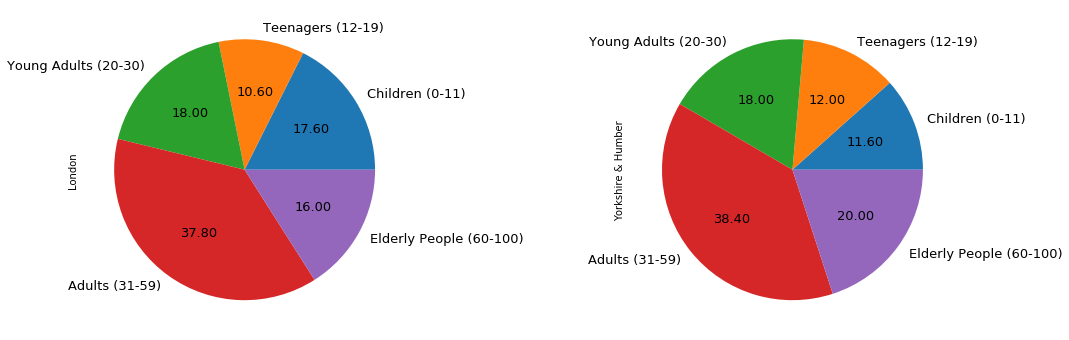

In [25]:
pieChart = peopleT.plot.pie(y=['London', 'Yorkshire & Humber'], figsize=(18, 6), rot = 0, fontsize = 13, subplots = True, autopct="%.2f", legend=None)

Even though there's a bit more children in London, we notice that there are much more elderly people, teenagers and adults in the Yorkshire and The Humber region. From this we get the vague idea that the average age for London is lower than that of the Yorkshire and The Humber region.

We can't tell however if our young adult statistic can be believed - it does tell us that young adults (20-30) make up about 18% of each region respectively and since both of those pie charts divide 500 people into 5 gorups, we can safely say that if their percentages are the same, then their count is the same - even though we already knew that from our bar plot.

Then the point we have to pay attention to is the distribution of the other age groups - it would be a logical fallacy to conclude that both of these regions have the same average age just because they match counts in a certain age group, we need to test this.

Before we begin our test we must see the probaility denisty of both the London and Yorkshite and the Humber, if they have a normal probability density then we can use a classical statistical method.

Firstly we need lists of their ages. We will be using these distributions for the test, so now we must use the 'sample_test' data frame - we are finished with exploring.

In [39]:
YHages = sample_test['Yorkshire and The Humber'].tolist()
Lages = sample_test['London'].tolist()

Now, we must make them in series and see the distributions, we can just use the plot,kde() method for a quick density plot.

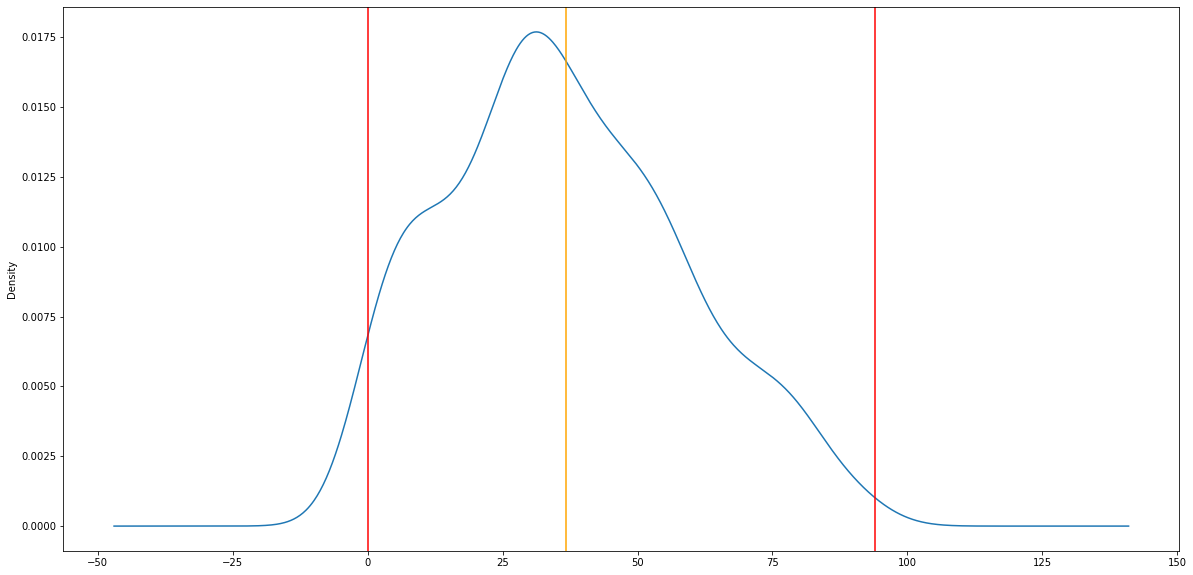

In [40]:
londonSeries = pd.Series(Lages)
fig, ax = plt.subplots(figsize=(20, 10))
ax = londonSeries.plot.kde()
ax.axvline(sample_test['London'].mean(), color='orange', linestyle='-')
ax.axvline(sample_test['London'].max(), color='red', linestyle='-')
ax.axvline(sample_test['London'].min(), color='red', linestyle='-')
ax

This is the probability distribution for the London area, as we see it's skewed.

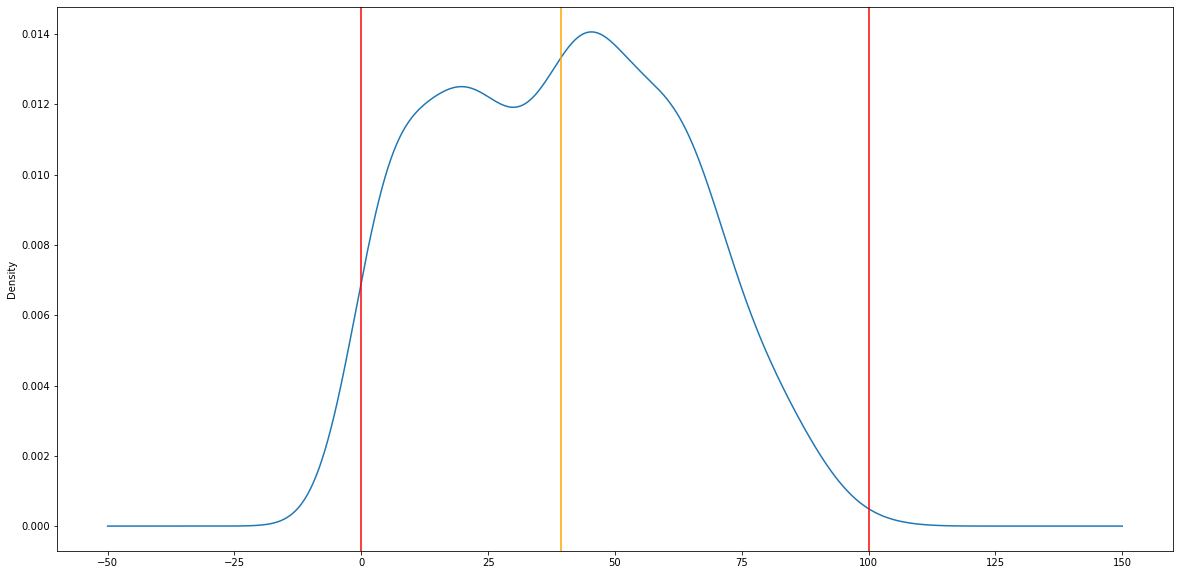

In [41]:
yorkshireSeries = pd.Series(YHages)
fig, yh = plt.subplots(figsize=(20, 10))
yh = yorkshireSeries.plot.kde()
yh.axvline(sample_test['Yorkshire and The Humber'].mean(), color='orange', linestyle='-')
yh.axvline(sample_test['Yorkshire and The Humber'].max(), color='red', linestyle='-')
yh.axvline(sample_test['Yorkshire and The Humber'].min(), color='red', linestyle='-')
yh

This is the probability distribution for the Yorkshire and the Humber area, as we see it's skewed.

For reference, the red lines represent the maximum and minimum values of the distributions and the orange one - the mean.

As we can see both distributiona are a bit skewed to the left and does exhibit occasional dips, but it is surpisingly normal for data from the real world. This all means that our z-test can be somewhat inaccurate, since it isn't a perfect normal distribution. We can however make this better by bootstrap sampling.

If we were to use bootstrap sampling we would ensure a much more normal distribution.

## Comparing average age in London and Yorkshire

I want to find out whether the average age in London is lower than the one in the Yorkshire and the Humber region. 

My null hypothesis is that on average people in London and Yorkshire and the Humber region have the same age. 

My alternative hypothesis is that on average, people are older in Yorkshire and the Humber region, rather than in London.

My probability level is 95% so my alpha value becomes 0.05 and I will be doing a right-tailed z-test to prove my hypothesis.

Before my test however I will use bootstrap sampling to ensure the normality of my distributions, because I want my z-test to be as accurate as possible. So I will first introduce the bootstraping algorithm first.

In [42]:
def sample_w_replace(data,L=None):
    if L is None:
        L=len(data)
    return np.random.choice(data,L,replace=True)

def Bootstrap_means(data,NTrials=1000):
    BSmeans=np.zeros(NTrials)
    for trial in range(NTrials):
        BSmeans[trial]=np.mean(sample_w_replace(data))
    return BSmeans

With these functions I can much more easily do bootstraping. The 'Bootstrap_mean' function gets the mean of the created samples, this way I can get a data frame a much more normalised distribution.

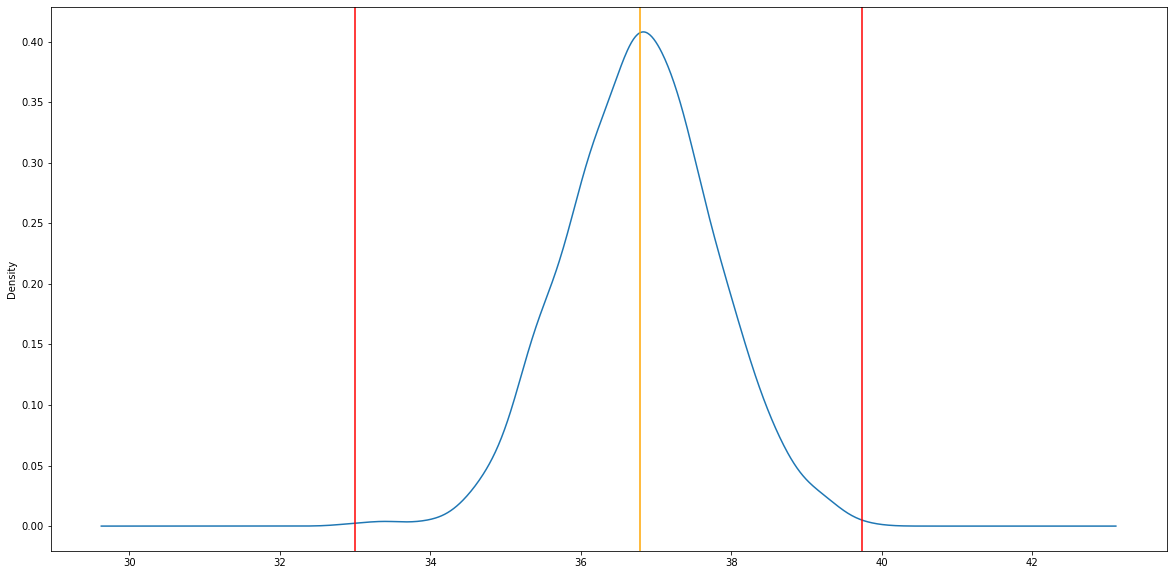

In [43]:
newData = Bootstrap_means(londonSeries)
newList = newData.tolist()
londonDF = pd.DataFrame({
                        'London' : newList
                        })
londonSeries = pd.Series(newList)
fig, ax = plt.subplots(figsize=(20, 10))
ax = londonSeries.plot.kde()
ax.axvline(londonDF['London'].mean(), color='orange', linestyle='-')
ax.axvline(londonDF['London'].max(), color='red', linestyle='-')
ax.axvline(londonDF['London'].min(), color='red', linestyle='-')
ax

This is the new distribution for London! As we can see it much bettwe now resembles a normal distribution - we do notice that we have a bell shape present but the top part seems to be leaning a bit to the right, the reason is simple - this is a drawback from the bootstrap sampling.

We don't use new data with these technique, so in a way, that odd lean to the right is just the watered down version of the first non-normal distribution.

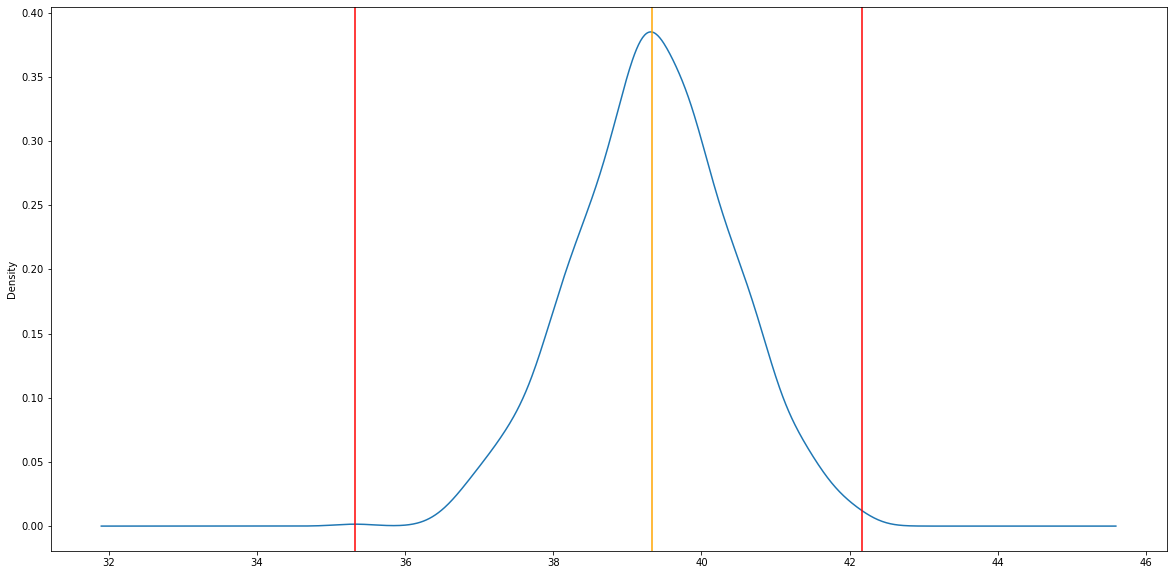

In [44]:
newData = Bootstrap_means(yorkshireSeries)
newList = newData.tolist()
yorkshireDF = pd.DataFrame({
                        'Yorkshire' : newList
                        })
yorkshireSeries = pd.Series(newList)
fig, ax = plt.subplots(figsize=(20, 10))
ax = yorkshireSeries.plot.kde()
ax.axvline(yorkshireDF['Yorkshire'].mean(), color='orange', linestyle='-')
ax.axvline(yorkshireDF['Yorkshire'].max(), color='red', linestyle='-')
ax.axvline(yorkshireDF['Yorkshire'].min(), color='red', linestyle='-')
ax

And this is the distribution for the Yourshire and The Humber Region - same things said about London apply here.

As we can see the distribution has imrpoved dramatically! The bumps have virtually disappeared and it is much more centered. Achieving a pure normal distribution with real life data is essentially impossible, so this level of precision should ensure an accurate result from a Z-test.

In [45]:
londonS = londonDF['London']
yorkshireS = yorkshireDF['Yorkshire']

Before the beginning of the test I transfer the data into lists for simplicity.

## Statistical test of the hypothesis

We need to get the critical value, thankfully, we can just use the .ppf method to do so. We input out alpha value and we subtract one since this is a right-tail test.

In [46]:
critical = stats.norm.ppf(1 - 0.05)

Now we need to calculate the test statistic. For it we need the difference between the two means and divide by the combined standard errors. Let's first get the mean difference.

In [47]:
diffMeans = yorkshireS.mean() - londonS.mean()

Now we can get the standard errors, I will calculate them by first finding out the variance and then dividing by the sample size.

In [48]:
varYH = yorkshireS.var()
varL = londonS.var()
londonList = londonS.tolist()
yorkshireList = yorkshireS.tolist()
combinedSEM = np.sqrt(varL/len(londonList) + varYH/len(yorkshireList))

Now we can finally find out our Z-statistic! All we have to do is divide the mean difference by the combined standard error.

In [49]:
zStatistics = diffMeans/combinedSEM

Having found out both the Z-statistic and the critical value, all that is left is to compare them, this is a right-tail test, so if the Z-statistic is bigger than the critical value, then we reject the null hypothesis.

In [52]:
if(zStatistics > critical):
    print("Null hypothesis rejected.")
else:
    print("Null hypothesis cannot be rejected.")

Null hypothesis rejected.


## Conclusions

Using the method of the right-tailed z-test, I found that the null hypothesis which states that on average people in London and Yorkshire and the Humber region have the same age is ruled out at 95% percent level. So then we can say with 95% confidence that the average person in London is younger than the average person from the Yorkshire and The Humber region.